In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

/home/merto/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
transform = transforms.ToTensor()

In [5]:
train_data = datasets.MNIST(root = '../Data', train = True, transform = transform, download= True)

In [7]:
test_data = datasets.MNIST(root = '../Data', train = False, transform = transform, download= True)

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test

In [9]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train

In [10]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [11]:
image, label = train_data[0]
image.shape

torch.Size([1, 28, 28])

In [12]:
label

5

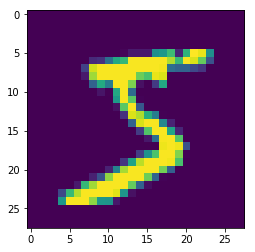

In [13]:
plt.imshow(image.reshape((28,28)))

In [16]:
torch.manual_seed(101)

train_loader = DataLoader(train_data , batch_size= 100, shuffle= True)

test_loader = DataLoader(test_data, batch_size= 500, shuffle= False)

In [18]:
from torchvision.utils import make_grid

for images, labels in train_loader:
    break

In [19]:
images.shape

torch.Size([100, 1, 28, 28])

In [20]:
labels

tensor([0, 5, 7, 8, 6, 7, 9, 7, 1, 3, 8, 4, 4, 2, 2, 1, 3, 7, 1, 6, 3, 1, 0, 4,
        6, 4, 6, 9, 1, 1, 4, 0, 1, 4, 1, 8, 9, 3, 2, 1, 0, 9, 3, 1, 1, 3, 0, 2,
        1, 6, 7, 5, 5, 1, 3, 7, 4, 9, 2, 9, 9, 7, 0, 9, 8, 5, 2, 1, 8, 8, 6, 1,
        7, 3, 9, 4, 8, 5, 3, 0, 4, 4, 7, 9, 3, 4, 2, 8, 8, 5, 3, 5, 6, 8, 1, 2,
        7, 0, 6, 7])

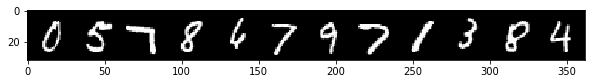

In [22]:
im = make_grid(images[:12], nrow = 12)
plt.figure(figsize= (10, 4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

In [23]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, in_sz = 784, out_sz = 10, layers = [120, 84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return F.log_softmax(x, dim= 1)

In [24]:
torch.manual_seed(101)
model = MultiLayerPerceptron()
model

MultiLayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [26]:
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [29]:
img = images.view(100, -1)
img.shape

torch.Size([100, 784])